# Semana 2: Reproducción del baseline

## 1. Entrenar un modelo base



In [13]:
# 1. Entrenar un modelo base (SVM)
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Cargar características
csv_path = Path("../data/ecg_features.csv")
df = pd.read_csv(csv_path)

# Definir X e y
features = ['media_mv','mstd_mV','skewness','kurtosis','rr_mean_s','rr_std_s']
X = df[features]
y = df['label']

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Entrenamiento
model = SVC(kernel='rbf', probability=True, random_state=42)
model.fit(X_train, y_train)

print(f"Entrenado SVM con {X_train.shape[0]} muestras de entrenamiento.")

Entrenado SVM con 21 muestras de entrenamiento.


## 2. Evaluar el desempeño del modelo

Accuracy:  0.556
Precision: 0.600
Recall:    0.600
F1-score:  0.600


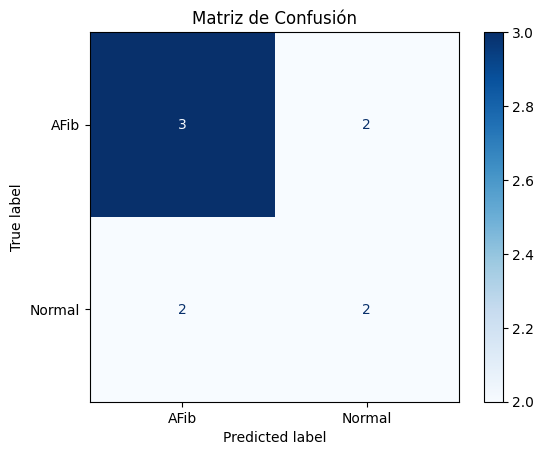

In [ ]:
# 2. Evaluación del modelo
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Predicción
y_pred = model.predict(X_test)

# Cálculo de métricas (AFib como positiva)
acc   = accuracy_score(y_test, y_pred)
prec  = precision_score(y_test, y_pred, pos_label='AFib')
rec   = recall_score(y_test, y_pred, pos_label='AFib')
f1    = f1_score(y_test, y_pred, pos_label='AFib')

print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-score:  {f1:.3f}")

# Matriz de confusión
disp = ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, display_labels=model.classes_, cmap=plt.cm.Blues
)
disp.ax_.set_title("Matriz de Confusión")
plt.show()


## 3. Análisis breve

- El modelo acierta en unos 6 de cada 10 casos (Accuracy ≈ 0.56), así que aún hay muchos errores.  
- De todas las veces que realmente hay AFib, solo detecta 6 de cada 10 (Recall = 0.60), pierde bastante.  
- Cuando dice “AFib”, acierta también 6 de cada 10 (Precision = 0.60), hay falsos positivos.  
